In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [3]:
cleaned_train_review = pd.read_csv('caches/cleaned_train_reviews_wordlist_nostopwords.csv', header=0, quoting=3)

In [4]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2), tokenizer=None, preprocessor=None, stop_words=None, max_features=5000)

In [5]:
train_set_features = vectorizer.fit_transform(cleaned_train_review['review']).toarray()
train_set_labels = cleaned_train_review['sentiment']

In [6]:
n_samples, n_features = train_set_features.shape
n_samples

25000

In [7]:
train_set_labels.shape

(25000,)

In [8]:
vocab = vectorizer.get_feature_names()
vocab[:10]

['able get',
 'able make',
 'able see',
 'able watch',
 'absolute worst',
 'absolutely brilliant',
 'absolutely hilarious',
 'absolutely love',
 'absolutely loved',
 'absolutely nothing']

In [9]:
dist = np.sum(train_set_features, axis=0)

In [10]:
for tag, count in list(zip(vocab, dist))[:10]:
    print(tag, count)

able get 52
able make 30
able see 54
able watch 35
absolute worst 34
absolutely brilliant 32
absolutely hilarious 41
absolutely love 35
absolutely loved 54
absolutely nothing 154


In [11]:
rf = RandomForestClassifier(n_estimators=100)

In [12]:
gnb = GaussianNB()

In [13]:
lr = LogisticRegression()

In [14]:
from roc_plot import roc_plot_nocv

start training and validating...
RandomForestClassifier done
GaussianNB done
LogisticRegression done


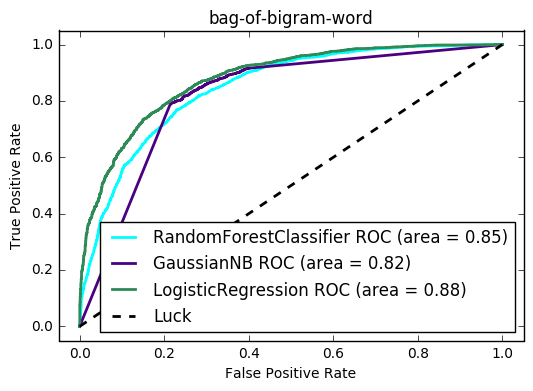

In [15]:
aucs = roc_plot_nocv(classifiers=[rf, gnb, lr], X=train_set_features, y=train_set_labels, plot_title="bag-of-bigram-word")